In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'sms-spam-collection-dataset:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F483%2F982%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240826%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240826T141147Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d331f58187a2f2a10f5f079e79c272da967d0ebcc6f7f3a55820e44b9c6b40ecff8123cddfe6e26ac3fc8a3032372d7e7f741b70057006d6427729253cc4c8aef367a52d3e79421e5feb8e153b2b6936ff44dddd39d7655868f3034c414f45c42a2e3aef23d1c8400c46832502d7fea4f31a711efb36030da3097634b23728b3df695b8cd1fca2877ed6336ee99ad89bb6eeceab4cd321615e016dbcedb09cde813532ec1ac9dbea6b0b8e3e61410bbc19158fc16174a920aca995232f2d8fb1169daa50d74f96de16eafbb293ee5cb031be2273bc80d144b926fb59c5fc531229a1ea642a89fa1e5c3e5f955904a00a86869a3da010ff29bcb95fd1e4438ae'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 215934 bytes downloaded
Downloaded and uncompressed: sms-spam-collection-dataset
Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


In [ ]:
!pip install nltk

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib .pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
import nltk
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
import pickle



In [ ]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')
ps = PorterStemmer()
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("/kaggle/input/sms-spam-collection-dataset/spam.csv", encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.shape

(5572, 5)

In [ ]:
#### Data Cleaning
#### EDA
#### Text Preprocessing
#### Model Building
#### Evaluation
#### Improvements
#### Website
#### Deployment

### 1. Data Cleaning


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop last 3 columns
df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace=True)
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
encoder = LabelEncoder()

In [ ]:
df["target"] = encoder.fit_transform(df["target"])

In [ ]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
## Missing values
df.isnull().sum()

,0
target,0
text,0


In [ ]:
# Duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep="first")

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(5169, 2)

### 2. EDA

In [ ]:
df["target"].value_counts()

,count
target,
0,4516
1,653


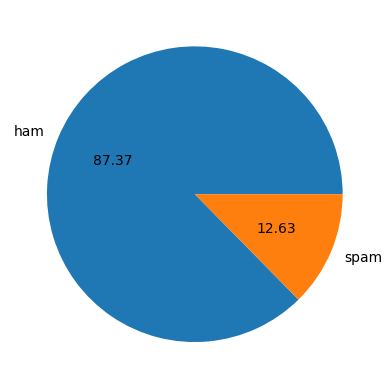

In [ ]:
plt.pie(df["target"].value_counts(), labels=["ham", "spam"], autopct="%0.2f")
plt.show()

In [ ]:
# There are imbalanced data.


In [ ]:
# Fetching number of characters in text
df["num_characters"] = df["text"].apply(len)

# Fetching number of words
df["num_words"] = df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

# Fetching number of sentences
df["num_sentences"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [ ]:
## Description for all the columns
df[["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
## Description for all the HAM columns
df[df["target"] == 0][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
## Description for all the SPAM columns
df[df["target"] == 1][["num_characters", "num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [ ]:
#### All the spam messages having slighly larger words.

<Axes: xlabel='num_characters', ylabel='Count'>

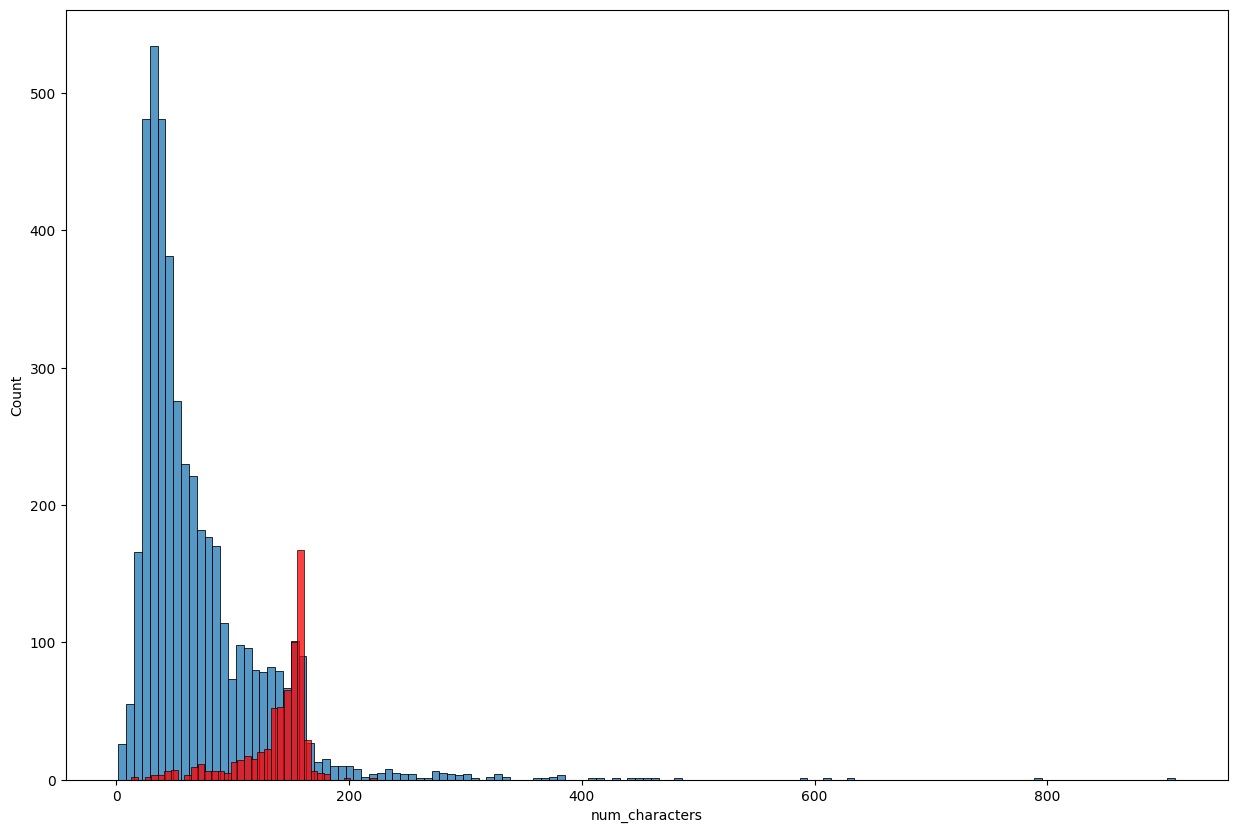

In [ ]:
#### Size of Histogram
plt.figure(figsize=(15, 10))

# Histogram for HAM messages
sns.histplot(df[df["target"] == 0]["num_characters"])

# Histogram for SPAM messages
sns.histplot(df[df["target"] == 1]["num_characters"], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

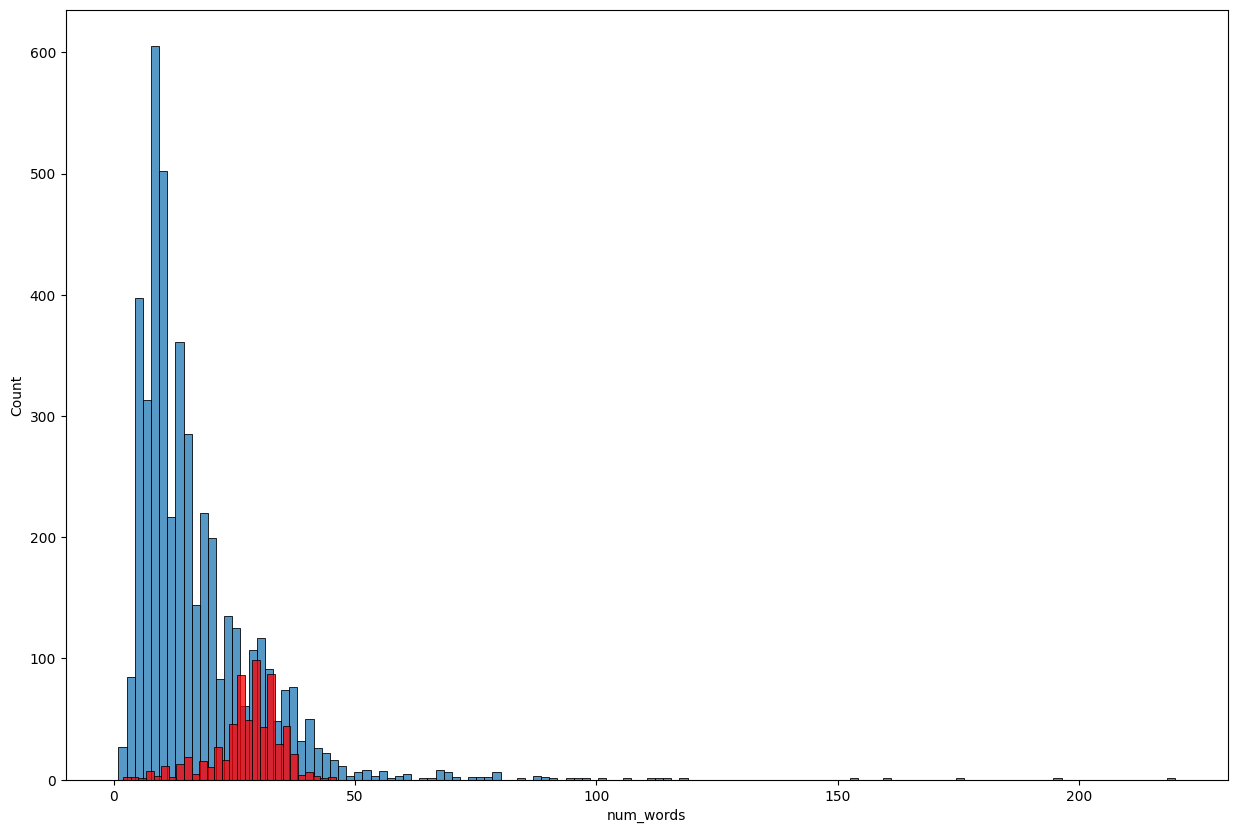

In [ ]:
#### Size of Histogram
plt.figure(figsize=(15, 10))

# Histogram for HAM messages
sns.histplot(df[df["target"] == 0]["num_words"])

# Histogram for SPAM messages
sns.histplot(df[df["target"] == 1]["num_words"], color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

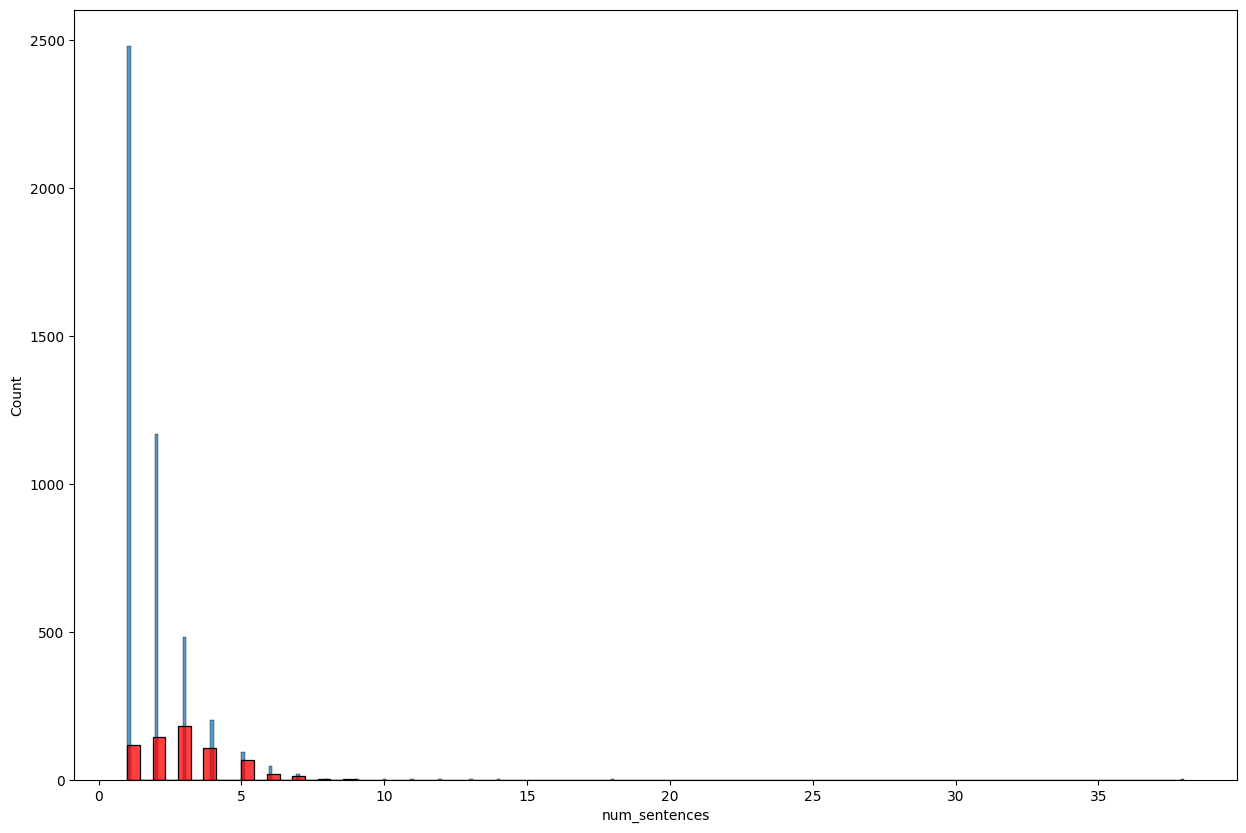

In [ ]:
#### Size of Histogram
plt.figure(figsize=(15, 10))

# Histogram for HAM messages
sns.histplot(df[df["target"] == 0]["num_sentences"])

# Histogram for SPAM messages
sns.histplot(df[df["target"] == 1]["num_sentences"], color='red')

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
numeric_values = df[["target", "num_characters", "num_words", "num_sentences"]]
numeric_values.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   target          5169 non-null   int64
 1   num_characters  5169 non-null   int64
 2   num_words       5169 non-null   int64
 3   num_sentences   5169 non-null   int64
dtypes: int64(4)
memory usage: 201.9 KB


<Axes: >

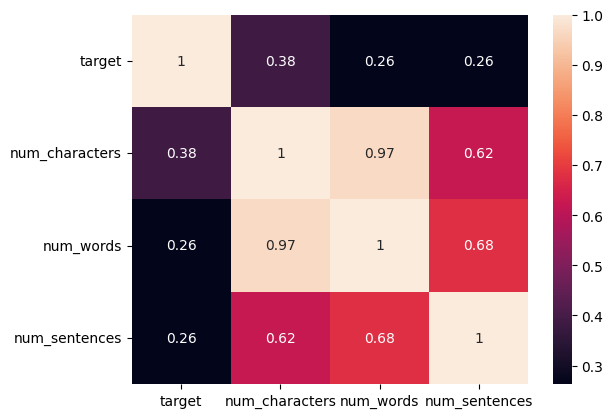

In [ ]:
#### Correlation between different numerical features
sns.heatmap(numeric_values.corr(), annot=True)

#### 3. Data Preprocessing

* Lower Case
* Tokenization
* Removing Special Characters
* Removing Stop Words & Punctuation
* Stemming

In [ ]:
nltk.download('stopwords') # Download the stopwords corpus


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def transform_text(text):
    ps = PorterStemmer()

    text = text.lower()  # Convert to lower case
    text = nltk.word_tokenize(text)  # Tokenize text

    chunks = []
    for i in text:
        if i.isalnum():
            chunks.append(i)

    filtered_chunks = []
    for i in chunks:
        if i not in stopwords.words("english") and i not in string.punctuation:
            filtered_chunks.append(i)

    stemmed_chunks = []
    for i in filtered_chunks:
        stemmed_chunks.append(ps.stem(i))

    return " ".join(stemmed_chunks)



In [ ]:
# Example usage
text = "This is an example sentence to be transformed!"
transform_text(text)



'exampl sentenc transform'

In [ ]:
transform_text("I love my India and it's culture. it's having a diverse background in putting every thing above.")

'love india cultur divers background put everi thing'

In [ ]:
df["transformed_text"] = df["text"].apply(transform_text)

In [ ]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


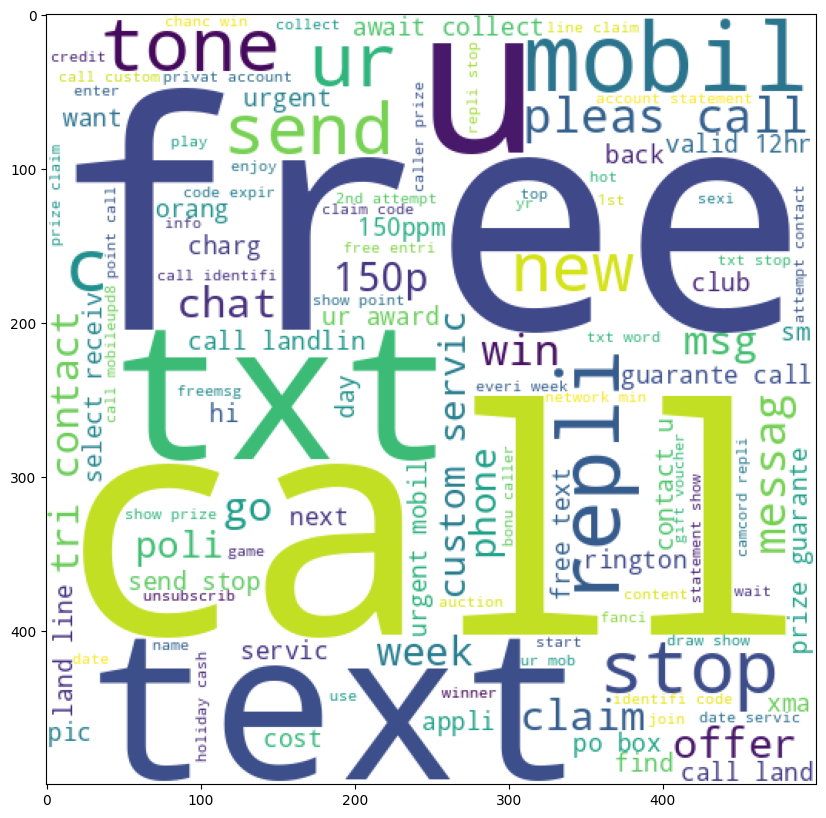

In [ ]:
## SPAM messages word cloud
spam_word_cloud = wc.generate(df[df["target"] == 1]["transformed_text"].str.cat(sep= " "))
plt.figure(figsize=(15, 10))
plt.imshow(spam_word_cloud)

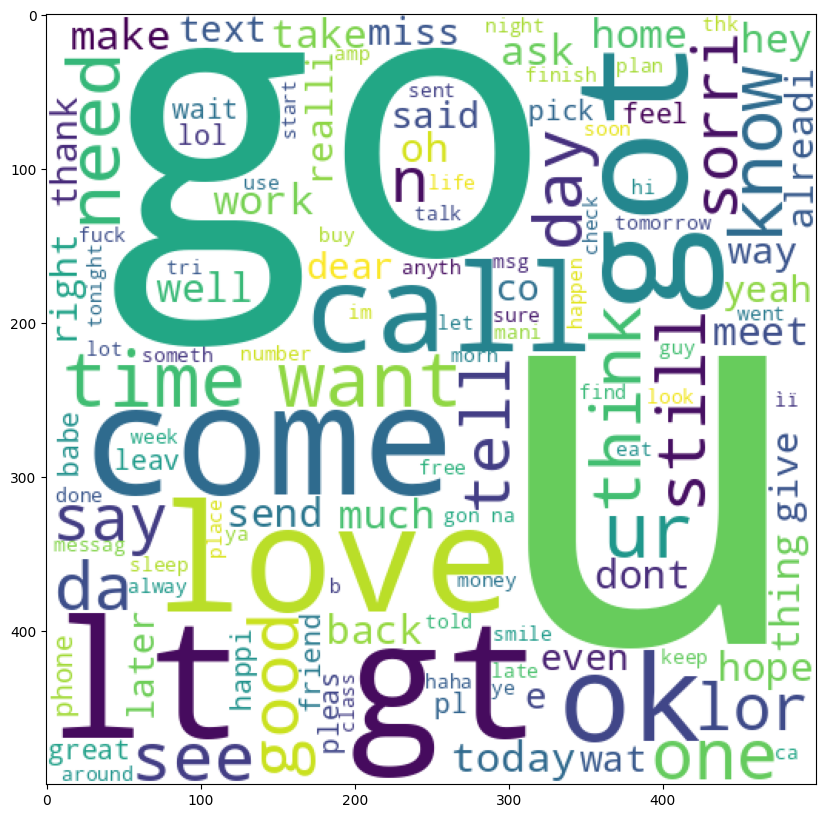

In [ ]:
## HAM messages word cloud
ham_word_cloud = wc.generate(df[df["target"] == 0]["transformed_text"].str.cat(sep= " "))
plt.figure(figsize=(15, 10))
plt.imshow(ham_word_cloud)

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
spam_corpus = []
for msg in df[df["target"] == 1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [ ]:
print(len(spam_corpus))

9939


In [ ]:
# Assuming spam_corpus is already defined
counter = Counter(spam_corpus)
most_common_spam_words = counter.most_common(30)
spam_words_dataframe = pd.DataFrame(most_common_spam_words, columns=['word', 'count'])
spam_words_dataframe.head()


,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


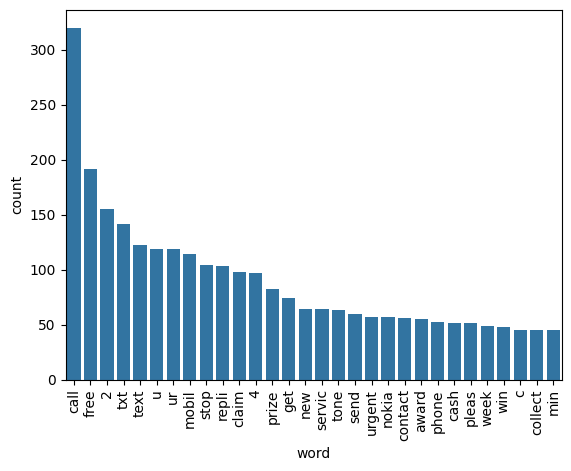

In [ ]:
sns.barplot(x='word', y='count', data=spam_words_dataframe)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
df.head(2)

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


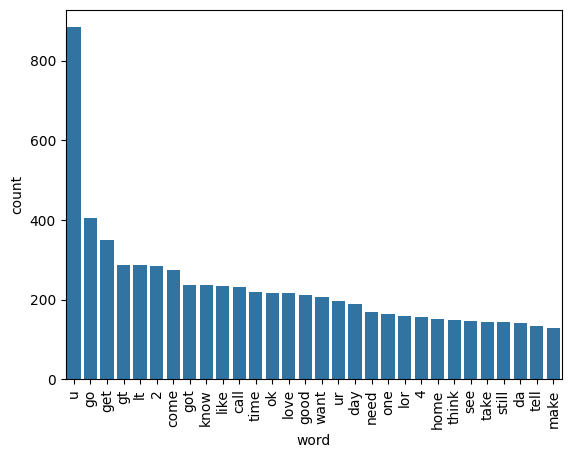

In [ ]:
# Check if 'target' column exists
if 'target' in df.columns:
    ham_corpus = []
    for msg in df[df["target"] == 0]["transformed_text"].tolist():
        for word in msg.split():
            ham_corpus.append(word)
else:
    print("Column 'target' does not exist in the DataFrame.")


# Assuming spam_corpus is already defined
counter = Counter(ham_corpus)
most_common_ham_words = counter.most_common(30)
ham_words_dataframe = pd.DataFrame(most_common_ham_words, columns=['word', 'count'])
ham_words_dataframe.head()

# Bar plotting
sns.barplot(x='word', y='count', data=ham_words_dataframe)
plt.xticks(rotation="vertical")
plt.show()

In [ ]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### 4. Model Building

BAG Of Words

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

cv = CountVectorizer()

tfidf = TfidfVectorizer()
tfidf_3k = TfidfVectorizer(max_features=3000)

In [ ]:
print("Modelling using CountVectorizer \n ")
X_cv = cv.fit_transform(df["transformed_text"]).toarray()
print(X_cv.shape)

y_cv = df["target"].values
print(y_cv.shape)
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_cv, y_cv, test_size=0.2, random_state=2)

# Sample Training data
print(X_train_cv[:2])
print(y_train_cv[:2])

# Sample test data
print(X_test_cv[:2])
print(y_test_cv[:2])


print(50 * "#")
print("\n Modelling using TFIDFVectorizer")
X_tfidf = tfidf.fit_transform(df["transformed_text"]).toarray()
print(X_tfidf.shape)

y_tfidf = df["target"].values
print(y_tfidf.shape)

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, y_tfidf, test_size=0.2, random_state=2)

# Sample Training data
print(X_train_tfidf[:2])
print(y_train_tfidf[:2])

# Sample test data
print(X_test_tfidf[:2])
print(y_test_tfidf[:2])


Modelling using CountVectorizer 
 
(5169, 6708)
(5169,)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0 0]
##################################################

 Modelling using TFIDFVectorizer
(5169, 6708)
(5169,)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0]


In [ ]:
print(50 * "#")
print("\n Modelling with TFIDF with max_feature 3k")
X_3k = tfidf_3k.fit_transform(df["transformed_text"]).toarray()
X_3k.shape

y_3k = df["target"].values
y_3k

X_train_3k, X_test_3k, y_train_3k, y_test_3k = train_test_split(X_3k, y_3k, test_size=0.2, random_state=2)

# Sample Training data
print(X_train_3k[:2])
print(y_train_3k[:2])

# Sample test data
print(X_test_3k[:2])
print(y_test_3k[:2])

##################################################

 Modelling with TFIDF with max_feature 3k
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0]


In [ ]:
print(50 * "#")
print("\n Modelling with TFIDF with max_feature 3k usig MinMaxScaling ")

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_3k)

y_scaled = df["target"].values
y_scaled

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=2)

# Sample Training data
print(X_train_scaled[:2])
print(y_train_scaled[:2])

# Sample test data
print(X_test_scaled[:2])
print(y_test_scaled[:2])

##################################################

 Modelling with TFIDF with max_feature 3k usig MinMaxScaling 
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0 0]


In [ ]:
# Fitting training data into Gaussian Naive Bayes model on CountVectorizer
gnb.fit(X_train_cv, y_train_cv)
gnb_predict_y_cv = gnb.predict(X_test_cv)
print(f"Accuracy score for Gaussian Naive Bayes model for CountVectorizer is - {round(accuracy_score(y_test_cv, gnb_predict_y_cv), 3)}")
print(f"Confusion matrix for Gaussian Naive Bayes model for CountVectorizer is - \n {confusion_matrix(y_test_cv, gnb_predict_y_cv)}")
print(f"Precision score for Gaussian Naive Bayes model for CountVectorizer is - {round(precision_score(y_test_cv, gnb_predict_y_cv), 3)} \n ")


print("############################################################################ \n")

# Fitting training data into Gaussian Naive Bayes model on TfidfVectorizer
gnb.fit(X_train_tfidf, y_train_tfidf)
gnb_predict_y_tfidf = gnb.predict(X_test_tfidf)
print(f"Accuracy score for Gaussian Naive Bayes model for TFIDFVectorizer is - {round(accuracy_score(y_test_tfidf, gnb_predict_y_tfidf), 3)}")
print(f"Confusion matrix for Gaussian Naive Bayes model for TFIDFVectorizer is - \n {confusion_matrix(y_test_tfidf, gnb_predict_y_tfidf)}")
print(f"Precision score for Gaussian Naive Bayes model for TFIDFVectorizer is - {round(precision_score(y_test_tfidf, gnb_predict_y_tfidf), 3)}")

Accuracy score for Gaussian Naive Bayes model for CountVectorizer is - 0.88
Confusion matrix for Gaussian Naive Bayes model for CountVectorizer is - 
 [[792 104]
 [ 20 118]]
Precision score for Gaussian Naive Bayes model for CountVectorizer is - 0.532 
 
############################################################################ 

Accuracy score for Gaussian Naive Bayes model for TFIDFVectorizer is - 0.876
Confusion matrix for Gaussian Naive Bayes model for TFIDFVectorizer is - 
 [[793 103]
 [ 25 113]]
Precision score for Gaussian Naive Bayes model for TFIDFVectorizer is - 0.523


In [ ]:
# Fitting training data into Multinomial Naive Bayes model on CountVectorizer
mnb.fit(X_train_cv, y_train_cv)
mnb_predict_y_cv = mnb.predict(X_test_cv)
print(f"Accuracy score for Multinomial Naive Bayes model for CountVectorizer is - {round(accuracy_score(y_test_cv, mnb_predict_y_cv), 3)}")
print(f"Confusion matrix for Multinomial Naive Bayes model for CountVectorizer is - \n {confusion_matrix(y_test_cv, mnb_predict_y_cv)}")
print(f"Precision score for Multinomial Naive Bayes model for CountVectorizer is - {round(precision_score(y_test_cv, mnb_predict_y_cv), 3)} \n ")


print("############################################################################ \n")

# Fitting training data into Multinomial Naive Bayes model on TfidfVectorizer
mnb.fit(X_train_tfidf, y_train_tfidf)
mnb_predict_y_tfidf = mnb.predict(X_test_tfidf)
print(f"Accuracy score for Multinomial Naive Bayes model for TFIDFVectorizer is - {round(accuracy_score(y_test_tfidf, mnb_predict_y_tfidf), 3)}")
print(f"Confusion matrix for Multinomial Naive Bayes model for TFIDFVectorizer is - \n {confusion_matrix(y_test_tfidf, mnb_predict_y_tfidf)}")
print(f"Precision score for Multinomial Naive Bayes model for TFIDFVectorizer is - {round(precision_score(y_test_tfidf, mnb_predict_y_tfidf), 3)}")

Accuracy score for Multinomial Naive Bayes model for CountVectorizer is - 0.964
Confusion matrix for Multinomial Naive Bayes model for CountVectorizer is - 
 [[871  25]
 [ 12 126]]
Precision score for Multinomial Naive Bayes model for CountVectorizer is - 0.834 
 
############################################################################ 

Accuracy score for Multinomial Naive Bayes model for TFIDFVectorizer is - 0.959
Confusion matrix for Multinomial Naive Bayes model for TFIDFVectorizer is - 
 [[896   0]
 [ 42  96]]
Precision score for Multinomial Naive Bayes model for TFIDFVectorizer is - 1.0


In [ ]:
# Fitting training data into Bernoulli Naive Bayes model on CountVectorizer
bnb.fit(X_train_cv, y_train_cv)
bnb_predict_y_cv = bnb.predict(X_test_cv)
print(f"Accuracy score for Bernoulli Naive Bayes model for CountVectorizer is - {round(accuracy_score(y_test_cv, bnb_predict_y_cv), 3)}")
print(f"Confusion matrix for Bernoulli Naive Bayes model for CountVectorizer is - \n {confusion_matrix(y_test_cv, bnb_predict_y_cv)}")
print(f"Precision score for Bernoulli Naive Bayes model for CountVectorizer is - {round(precision_score(y_test_cv, bnb_predict_y_cv), 3)} \n ")

print("############################################################################ \n")

# Fitting training data into Bernoulli Naive Bayes model on TfidfVectorizer
bnb.fit(X_train_tfidf, y_train_tfidf)
bnb_predict_y_tfidf = bnb.predict(X_test_tfidf)
print(f"Accuracy score for Bernoulli Naive Bayes model for TFIDFVectorizer is - {round(accuracy_score(y_test_tfidf, bnb_predict_y_tfidf), 3)}")
print(f"Confusion matrix for Bernoulli Naive Bayes model for TFIDFVectorizer is - \n {confusion_matrix(y_test_tfidf, bnb_predict_y_tfidf)}")
print(f"Precision score for Bernoulli Naive Bayes model for TFIDFVectorizer is - {round(precision_score(y_test_tfidf, bnb_predict_y_tfidf), 3)}")

Accuracy score for Bernoulli Naive Bayes model for CountVectorizer is - 0.97
Confusion matrix for Bernoulli Naive Bayes model for CountVectorizer is - 
 [[893   3]
 [ 28 110]]
Precision score for Bernoulli Naive Bayes model for CountVectorizer is - 0.973 
 
############################################################################ 

Accuracy score for Bernoulli Naive Bayes model for TFIDFVectorizer is - 0.97
Confusion matrix for Bernoulli Naive Bayes model for TFIDFVectorizer is - 
 [[893   3]
 [ 28 110]]
Precision score for Bernoulli Naive Bayes model for TFIDFVectorizer is - 0.973


TFIDF -> MNB

In [ ]:
# test1 = ['Hello, You are learning natural Language Processing']
# test2 = ['Hope you are doing good and learning new things !']
# test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

# print(bnb.predict(test1))
# print(bnb.predict(test2))
# print(bnb.predict(test3))

# print('*' * 20)
# print(bnb.predict(test1))
# print(bnb.predict(test2))
# print(bnb.predict(test3))

In [ ]:
svc = SVC(kernel="sigmoid", gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=50)

In [ ]:
clfs = {
    "Support Vector Classification": svc,
    "KNeighbours Classifier" : knc,
    "Multinomial Naive Bayes Classifier" : mnb,
    "Decision Tree Classifier" : dtc,
    "Logistic Regression" : lrc,
    "Random Forest Classifier" : rfc,
    "AdaBoost Classifier" : abc,
    "Bagging Classifier" : bc,
    "Extra Trees Classifier" : etc,
    "Gradient Boosting Classifier" : gbdt,
    "XGBClassier" : xgb
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [ ]:
train_classifier(svc, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)
# train_classifier(svc, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

(0.9729206963249516, 0.9741379310344828)

In [ ]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    accuracy, precision = train_classifier(clf, X_train_tfidf, y_train_tfidf, X_test_tfidf, y_test_tfidf)

    print(f"\nFor {name} algorithm")
    print(f"Accuracy of model is {accuracy}")
    print(f"Precision of model is {precision}")

    accuracy_scores.append(accuracy)
    precision_scores.append(precision)


For Support Vector Classification algorithm
Accuracy of model is 0.9729206963249516
Precision of model is 0.9741379310344828

For KNeighbours Classifier algorithm
Accuracy of model is 0.9003868471953579
Precision of model is 1.0

For Multinomial Naive Bayes Classifier algorithm
Accuracy of model is 0.9593810444874274
Precision of model is 1.0

For Decision Tree Classifier algorithm
Accuracy of model is 0.9361702127659575
Precision of model is 0.8461538461538461

For Logistic Regression algorithm
Accuracy of model is 0.9516441005802708
Precision of model is 0.94

For Random Forest Classifier algorithm
Accuracy of model is 0.971953578336557
Precision of model is 1.0

For AdaBoost Classifier algorithm
Accuracy of model is 0.9613152804642167
Precision of model is 0.9454545454545454

For Bagging Classifier algorithm
Accuracy of model is 0.9584139264990329
Precision of model is 0.8625954198473282

For Extra Trees Classifier algorithm
Accuracy of model is 0.9729206963249516
Precision of mode

In [ ]:
performace_df = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy": accuracy_scores, "Precision": precision_scores}).sort_values("Accuracy", ascending=False)
performace_df

,Algorithm,Accuracy,Precision
0,Support Vector Classification,0.972921,0.974138
8,Extra Trees Classifier,0.972921,0.982456
10,XGBClassier,0.972921,0.943548
5,Random Forest Classifier,0.971954,1.000000
6,AdaBoost Classifier,0.961315,0.945455
2,Multinomial Naive Bayes Classifier,0.959381,1.000000
7,Bagging Classifier,0.958414,0.862595
9,Gradient Boosting Classifier,0.952611,0.923810
4,Logistic Regression,0.951644,0.940000
3,Decision Tree Classifier,0.936170,0.846154


In [ ]:
# Melting the DataFrame for seaborn
performace_df1 = pd.melt(performace_df, id_vars="Algorithm")


In [ ]:
performace_df1

,Algorithm,variable,value
0,Support Vector Classification,Accuracy,0.972921
1,Extra Trees Classifier,Accuracy,0.972921
2,XGBClassier,Accuracy,0.972921
3,Random Forest Classifier,Accuracy,0.971954
4,AdaBoost Classifier,Accuracy,0.961315
5,Multinomial Naive Bayes Classifier,Accuracy,0.959381
6,Bagging Classifier,Accuracy,0.958414
7,Gradient Boosting Classifier,Accuracy,0.952611
8,Logistic Regression,Accuracy,0.951644
9,Decision Tree Classifier,Accuracy,0.936170


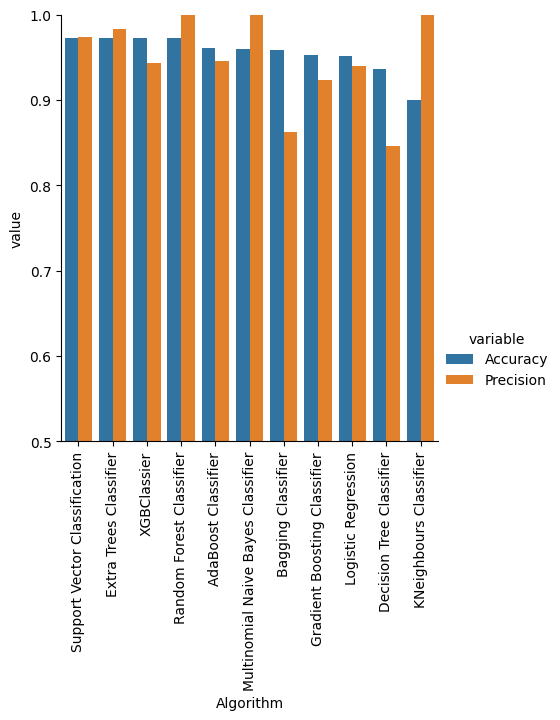

In [ ]:
sns.catplot(x = "Algorithm", y="value", hue="variable", data=performace_df1, kind="bar", height=5)
plt.ylim(.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
accuracy_3k = []
precision_3k = []

for name, clf in clfs.items():

    accuracy, precision = train_classifier(clf, X_train_3k, y_train_3k, X_test_3k, y_test_3k)

    print(f"\nFor {name} algorithm")
    print(f"Accuracy of model is {accuracy}")
    print(f"Precision of model is {precision}")

    accuracy_3k.append(accuracy)
    precision_3k.append(precision)


For Support Vector Classification algorithm
Accuracy of model is 0.9758220502901354
Precision of model is 0.9747899159663865

For KNeighbours Classifier algorithm
Accuracy of model is 0.9052224371373307
Precision of model is 1.0

For Multinomial Naive Bayes Classifier algorithm
Accuracy of model is 0.9709864603481625
Precision of model is 1.0

For Decision Tree Classifier algorithm
Accuracy of model is 0.9294003868471954
Precision of model is 0.8282828282828283

For Logistic Regression algorithm
Accuracy of model is 0.9584139264990329
Precision of model is 0.9702970297029703

For Random Forest Classifier algorithm
Accuracy of model is 0.9758220502901354
Precision of model is 0.9829059829059829

For AdaBoost Classifier algorithm
Accuracy of model is 0.960348162475822
Precision of model is 0.9292035398230089

For Bagging Classifier algorithm
Accuracy of model is 0.9584139264990329
Precision of model is 0.8682170542635659

For Extra Trees Classifier algorithm
Accuracy of model is 0.97485

In [ ]:
df_3k = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_max_ft_3k": accuracy_3k, "Precision_max_ft_3k": precision_3k}).sort_values("Accuracy_max_ft_3k", ascending=False)
df_3k

,Algorithm,Accuracy_max_ft_3k,Precision_max_ft_3k
0,Support Vector Classification,0.975822,0.974790
5,Random Forest Classifier,0.975822,0.982906
8,Extra Trees Classifier,0.974855,0.974576
2,Multinomial Naive Bayes Classifier,0.970986,1.000000
10,XGBClassier,0.967118,0.926230
6,AdaBoost Classifier,0.960348,0.929204
4,Logistic Regression,0.958414,0.970297
7,Bagging Classifier,0.958414,0.868217
9,Gradient Boosting Classifier,0.946809,0.919192
3,Decision Tree Classifier,0.929400,0.828283


In [ ]:
# Melting the DataFrame for seaborn
performace_df2 = pd.melt(df_3k, id_vars="Algorithm")
performace_df2

,Algorithm,variable,value
0,Support Vector Classification,Accuracy_max_ft_3k,0.975822
1,Random Forest Classifier,Accuracy_max_ft_3k,0.975822
2,Extra Trees Classifier,Accuracy_max_ft_3k,0.974855
3,Multinomial Naive Bayes Classifier,Accuracy_max_ft_3k,0.970986
4,XGBClassier,Accuracy_max_ft_3k,0.967118
5,AdaBoost Classifier,Accuracy_max_ft_3k,0.960348
6,Logistic Regression,Accuracy_max_ft_3k,0.958414
7,Bagging Classifier,Accuracy_max_ft_3k,0.958414
8,Gradient Boosting Classifier,Accuracy_max_ft_3k,0.946809
9,Decision Tree Classifier,Accuracy_max_ft_3k,0.929400


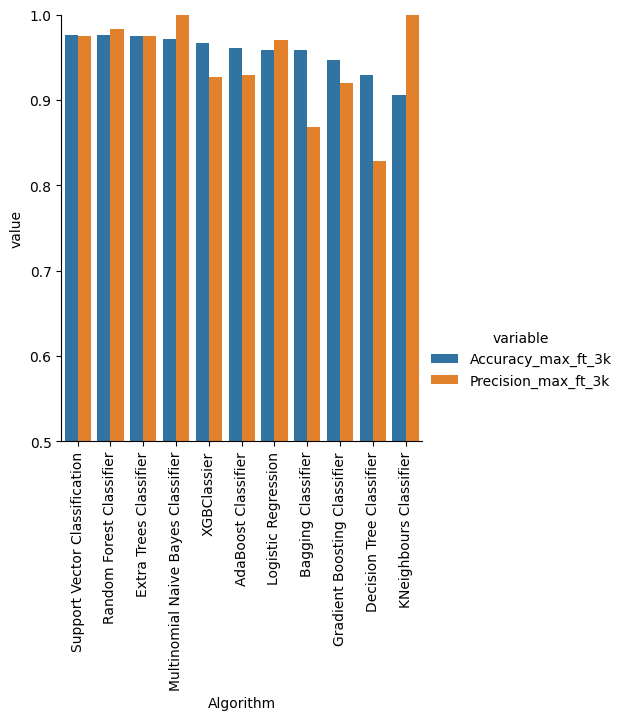

In [ ]:
sns.catplot(x = "Algorithm", y="value", hue="variable", data=performace_df2, kind="bar", height=5)
plt.ylim(.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
merged_df = pd.merge(performace_df, df_3k, on = "Algorithm")
merged_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3k,Precision_max_ft_3k
0,Support Vector Classification,0.972921,0.974138,0.975822,0.974790
1,Extra Trees Classifier,0.972921,0.982456,0.974855,0.974576
2,XGBClassier,0.972921,0.943548,0.967118,0.926230
3,Random Forest Classifier,0.971954,1.000000,0.975822,0.982906
4,AdaBoost Classifier,0.961315,0.945455,0.960348,0.929204
5,Multinomial Naive Bayes Classifier,0.959381,1.000000,0.970986,1.000000
6,Bagging Classifier,0.958414,0.862595,0.958414,0.868217
7,Gradient Boosting Classifier,0.952611,0.923810,0.946809,0.919192
8,Logistic Regression,0.951644,0.940000,0.958414,0.970297
9,Decision Tree Classifier,0.936170,0.846154,0.929400,0.828283


In [ ]:
# model improvement

# 1. Change the max_features parameter of TFIDF
# 2.

In [ ]:
accuracy_scaled = []
precision_scaled = []

for name, clf in clfs.items():

    accuracy, precision = train_classifier(clf, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled)

    print(f"\nFor {name} algorithm")
    print(f"Accuracy of model is {accuracy}")
    print(f"Precision of model is {precision}")

    accuracy_scaled.append(accuracy)
    precision_scaled.append(precision)


For Support Vector Classification algorithm
Accuracy of model is 0.9690522243713733
Precision of model is 0.9274193548387096

For KNeighbours Classifier algorithm
Accuracy of model is 0.9052224371373307
Precision of model is 0.9761904761904762

For Multinomial Naive Bayes Classifier algorithm
Accuracy of model is 0.9787234042553191
Precision of model is 0.9461538461538461

For Decision Tree Classifier algorithm
Accuracy of model is 0.9294003868471954
Precision of model is 0.8282828282828283

For Logistic Regression algorithm
Accuracy of model is 0.9671179883945842
Precision of model is 0.9642857142857143

For Random Forest Classifier algorithm
Accuracy of model is 0.9758220502901354
Precision of model is 0.9829059829059829

For AdaBoost Classifier algorithm
Accuracy of model is 0.960348162475822
Precision of model is 0.9292035398230089

For Bagging Classifier algorithm
Accuracy of model is 0.9584139264990329
Precision of model is 0.8682170542635659

For Extra Trees Classifier algorith

In [ ]:
df_scaled = pd.DataFrame({"Algorithm": clfs.keys(), "Accuracy_scaled": accuracy_scaled, "Precision_scaled": precision_scaled}).sort_values("Accuracy_scaled", ascending=False)
df_scaled


,Algorithm,Accuracy_scaled,Precision_scaled
2,Multinomial Naive Bayes Classifier,0.978723,0.946154
5,Random Forest Classifier,0.975822,0.982906
8,Extra Trees Classifier,0.974855,0.974576
0,Support Vector Classification,0.969052,0.927419
4,Logistic Regression,0.967118,0.964286
10,XGBClassier,0.967118,0.926230
6,AdaBoost Classifier,0.960348,0.929204
7,Bagging Classifier,0.958414,0.868217
9,Gradient Boosting Classifier,0.946809,0.919192
3,Decision Tree Classifier,0.929400,0.828283


In [ ]:
# Melting the DataFrame for seaborn
performace_df3 = pd.melt(df_scaled, id_vars="Algorithm")
performace_df3


,Algorithm,variable,value
0,Multinomial Naive Bayes Classifier,Accuracy_scaled,0.978723
1,Random Forest Classifier,Accuracy_scaled,0.975822
2,Extra Trees Classifier,Accuracy_scaled,0.974855
3,Support Vector Classification,Accuracy_scaled,0.969052
4,Logistic Regression,Accuracy_scaled,0.967118
5,XGBClassier,Accuracy_scaled,0.967118
6,AdaBoost Classifier,Accuracy_scaled,0.960348
7,Bagging Classifier,Accuracy_scaled,0.958414
8,Gradient Boosting Classifier,Accuracy_scaled,0.946809
9,Decision Tree Classifier,Accuracy_scaled,0.929400


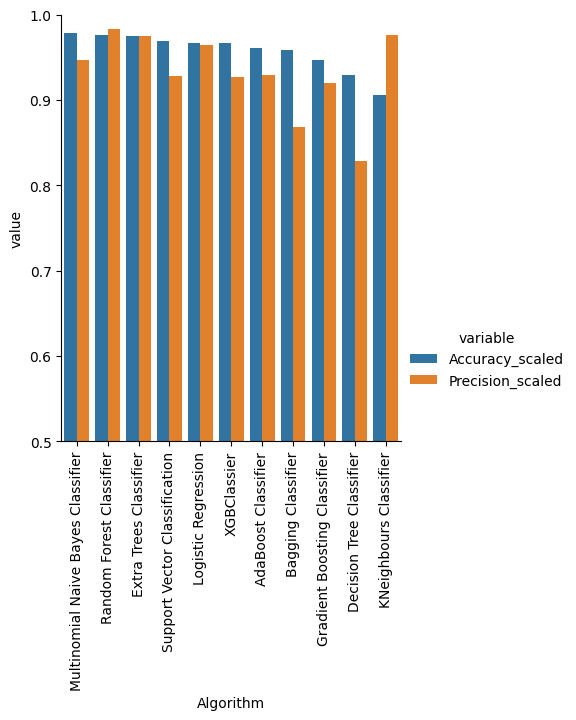

In [ ]:
sns.catplot(x = "Algorithm", y="value", hue="variable", data=performace_df3, kind="bar", height=5)
plt.ylim(.5, 1.0)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
final_df = pd.merge(merged_df, df_scaled, on = "Algorithm")  # .sort_values("Accuracy", ascending=False)
final_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3k,Precision_max_ft_3k,Accuracy_scaled,Precision_scaled
0,Support Vector Classification,0.972921,0.974138,0.975822,0.974790,0.969052,0.927419
1,Extra Trees Classifier,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576
2,XGBClassier,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230
3,Random Forest Classifier,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906
4,AdaBoost Classifier,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
5,Multinomial Naive Bayes Classifier,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
6,Bagging Classifier,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217
7,Gradient Boosting Classifier,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192
8,Logistic Regression,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
9,Decision Tree Classifier,0.936170,0.846154,0.929400,0.828283,0.929400,0.828283


1. Multinomial Naive Bayes Classifier is giving best results with Accuracy 0.973 and Precision 1.000 .


In [ ]:
pickle.dump(tfidf_3k, open('vectorizer.pkl', 'wb'))

In [ ]:
pickle.dump(mnb, open("model.pkl", "wb"))